# GLOBAL VARIABLES

In [287]:
DATA_PATH = './Data/rocket_league_skillshots.data'

# LIBRARIES

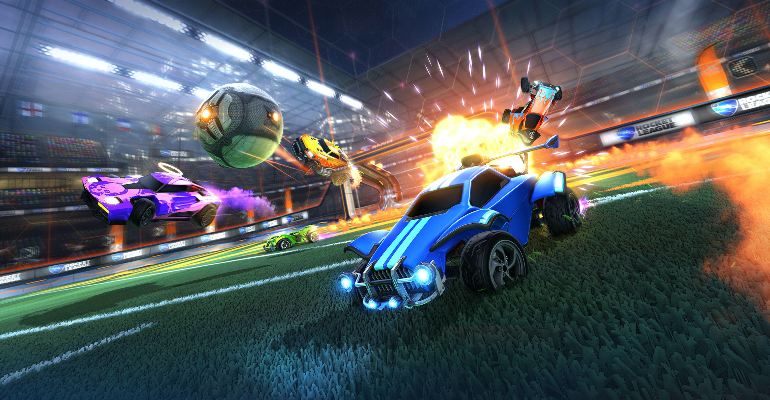

In [288]:
import pandas as pd
import numpy as np
from collections import defaultdict
from IPython.display import Image
import matplotlib.pyplot as plt
Image(filename='./Asset/RL.png') 

# **ABOUT THE DATA**
### Author: 
- Romain Mathonat - University de Lyon, CNRS, INSA Lyon (romain.mathonat@gmail.com)
- Citations: *Mathonat, R. (2020). Rocket League Skillshots [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5S035.*

### License: 
- This dataset is licensed under a **Creative Commons Attribution 4.0 International (CC BY 4.0)** license that is required upon being uploaded to **Kaggle**. \
*This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.*

### Source: 
- This dataset originated from the hit video game **'Rocket League'** where a football game is made up of cars!  

## **Importing the Data:**
- This section import the data and read them as `lines` for restructuring.

In [289]:
# Read the data from the file
with open(DATA_PATH, 'r') as file:
    lines = file.readlines()

# Initialize variables
data_blocks = defaultdict(list) # including data class and values of all features
current_class = None # class of the data_block

## **Exploring the Data:**
This section involves exploring the dataset to understand its structure, detect potential issues, and prepare it for analysis.

### Key Tasks:
1. Restructuring the data into a dataframe with an extra `Class`.
2. Identify rows, columns, and general structure.
3. Check for duplicate or missing data
4. Examine the distribution of numerical and categorical columns.
5. Ensure data types are appropriate.
6. Basic visualizations.

In [290]:
# --------------- Parsing the dataset into structured format ---------------
# Iterate through each line to categorize by class
for line in lines[1:]:  # Skip the header line
    line = line.strip()
    if line.isdigit() or (line.startswith('-') and line[1:].isdigit()):
        current_class = int(line)
    elif current_class is not None:
        data_blocks[current_class].append(list(map(float, line.split())))

# Convert each class block into a dataframe
dfs = {cls: pd.DataFrame(data, columns=lines[0].strip().split()) for cls, data in data_blocks.items()}

# Create a unified dataframe with an additional 'Class' column
combined_df = pd.concat([df.assign(Class=cls) for cls, df in dfs.items()], ignore_index=True)

# Display the first few rows of the combined dataframe
combined_df.head()

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,accelerate,slow,goal,left,boost,camera,down,right,slide,jump,Class
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6


In [291]:
# 1. Check for duplicate and missing data
duplicate_count = combined_df.duplicated().sum()
missing_data_count = combined_df.isnull().sum()

# 2. Examine the distribution of numerical and categorical columns
numerical_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = combined_df.select_dtypes(include=['object']).columns

numerical_summary = combined_df[numerical_columns].describe()

# 3. Check data types
data_types = combined_df.dtypes

# Display results
duplicate_count, missing_data_count, numerical_summary, data_types

(15,
 BallAcceleration    0
 Time                0
 DistanceWall        0
 DistanceCeil        0
 DistanceBall        0
 PlayerSpeed         0
 BallSpeed           0
 up                  0
 accelerate          0
 slow                0
 goal                0
 left                0
 boost               0
 camera              0
 down                0
 right               0
 slide               0
 jump                0
 Class               0
 dtype: int64,
        BallAcceleration         Time   DistanceWall  DistanceCeil  \
 count       6892.000000  6892.000000    6892.000000   6892.000000   
 mean       -3919.343775     2.104198    3814.275050   1654.879848   
 std        46931.140062     1.748528   14439.166026    565.840926   
 min      -319123.135620     0.000000       0.000000      0.070000   
 25%        -2166.687659     0.763877    1084.260000   1331.655000   
 50%          -27.293854     1.701767    3101.885000   1959.010000   
 75%         1054.076610     3.096547    3744.822500 

Class
 5    1601
 2    1170
-1    1023
 1    1005
 6     932
 7     701
 3     460
Name: count, dtype: int64


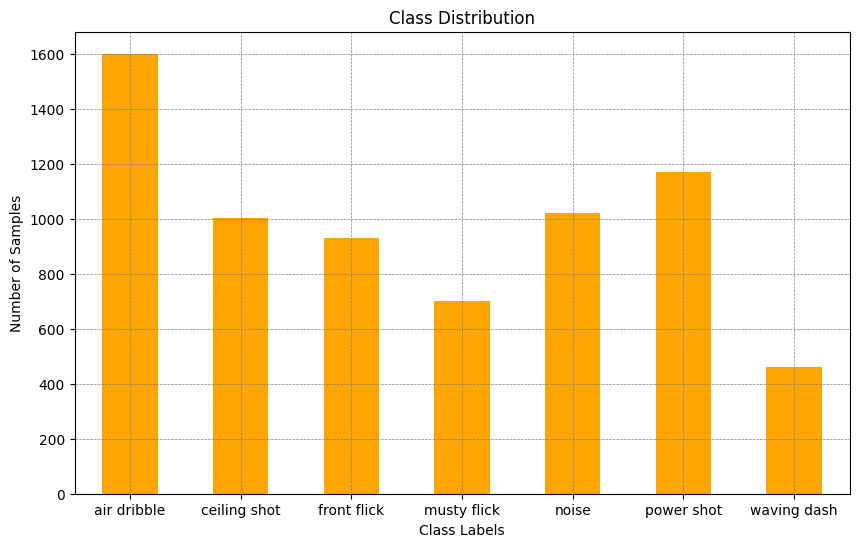

In [ ]:
# Define the lists for classes
classes_labels = {-1: 'noise', 
                  1: 'ceiling shot', 
                  2: 'power shot', 
                  3: 'waving dash', 
                  5: 'air dribble', 
                  6: 'front flick', 
                  7: 'musty flick'}

# Display class distribution
class_distribution = combined_df['Class'].value_counts()

# Match the class labels with the class distribution
class_distribution.index = class_distribution.index.map(classes_labels)

# Plot class distribution
plt.figure(figsize=(10, 6))
class_distribution.sort_index().plot(kind='bar', color='orange')
plt.title('Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()

<Figure size 2000x2000 with 0 Axes>

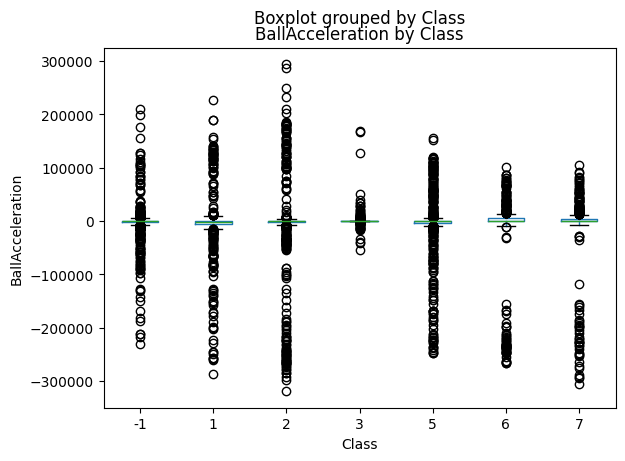

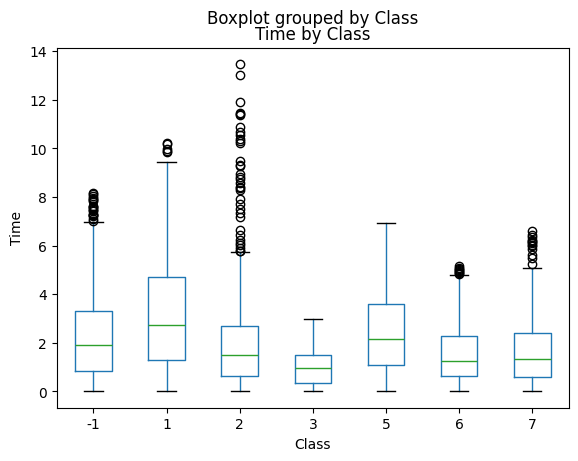

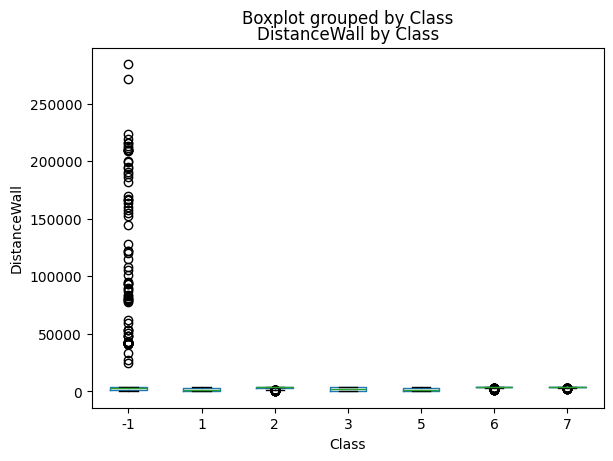

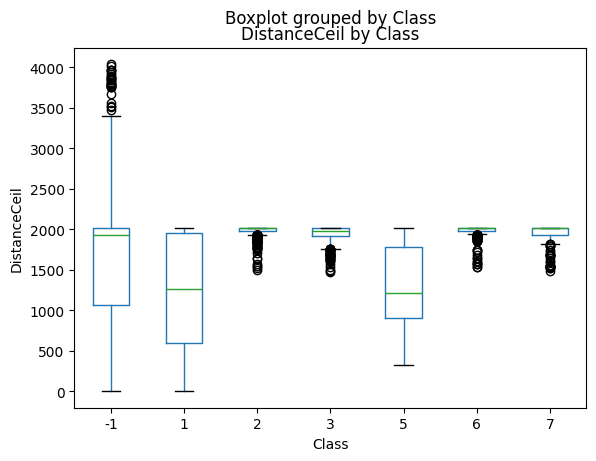

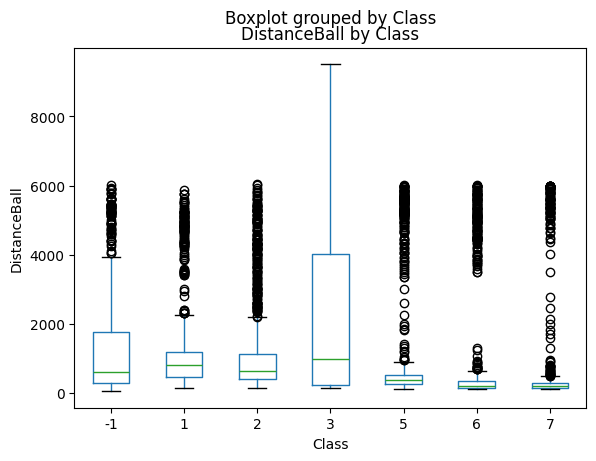

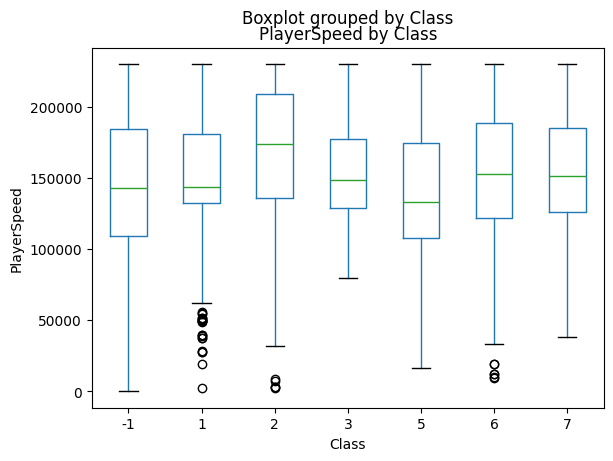

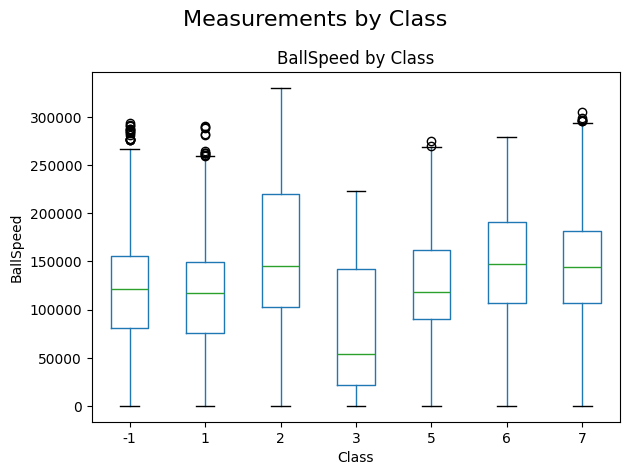

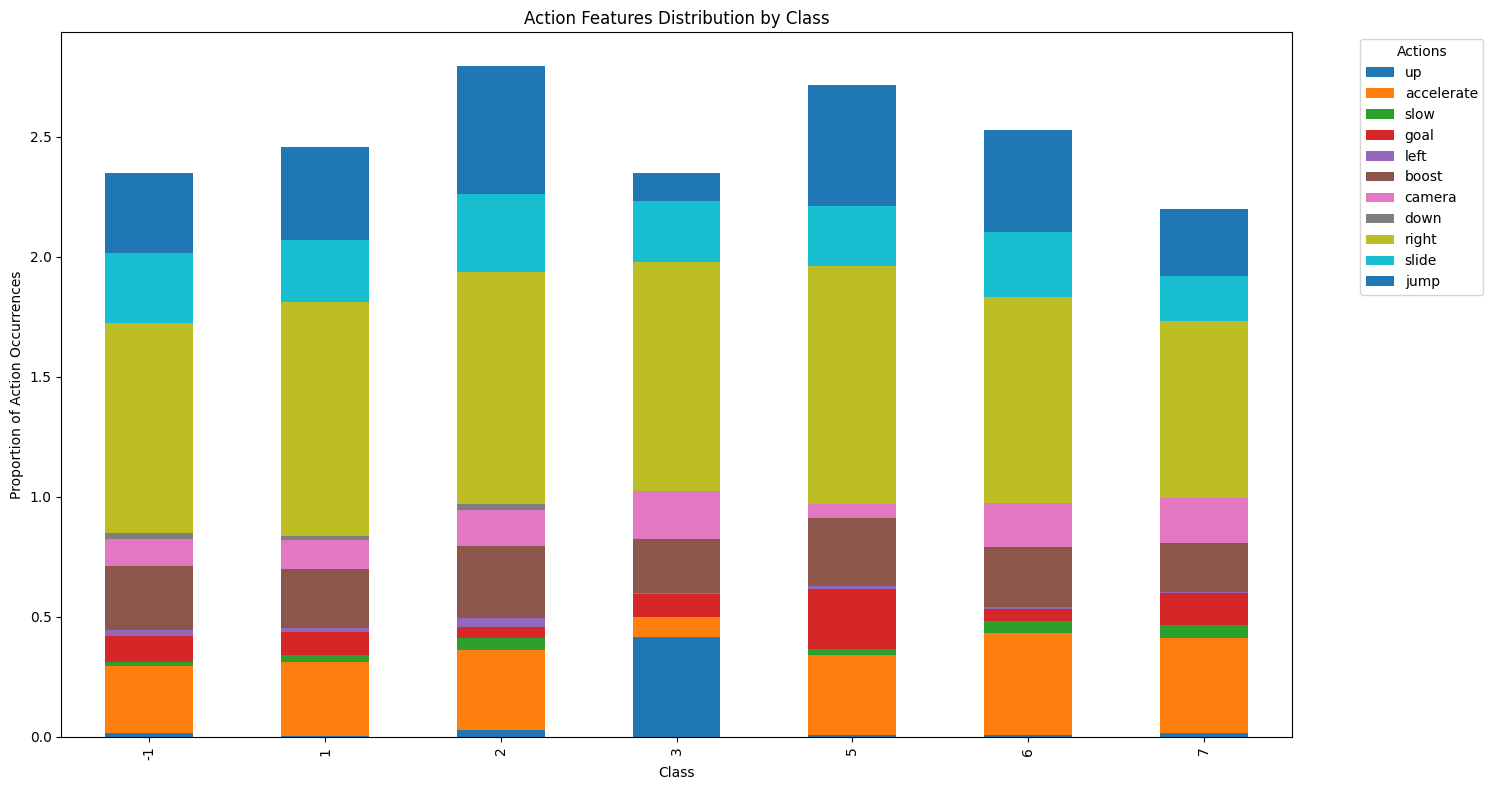

In [293]:
# Define the lists for measurements and actions
measurement_features = ['BallAcceleration', 'Time', 'DistanceWall', 'DistanceCeil',
                        'DistanceBall', 'PlayerSpeed', 'BallSpeed']

action_features = ['up', 'accelerate', 'slow', 'goal', 'left', 'boost', 'camera', 
                   'down', 'right', 'slide', 'jump']

# Plot boxplots for measurement features
plt.figure(figsize=(20,20))
for i, feature in enumerate(measurement_features, start=1):
    combined_df.boxplot(column=feature, by='Class', grid=False, vert=True)
    plt.title(f'{feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)
plt.suptitle('Measurements by Class', fontsize=16)
plt.tight_layout()
plt.show()

# Plot stacked bar charts for action features
action_summary = combined_df.groupby('Class')[action_features].mean()

# Plot action features as a stacked bar chart
action_summary.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Action Features Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Proportion of Action Occurrences')
plt.legend(title='Actions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Initial Observations**

### Data shape: 
- $19$ columns of **attributes**.
- $7191$ rows of **entries**. 

### Data structure:
The dataset has the following structure:
- **Class Labels**: A line with only 1 interger that specifies the class label for the upcoming block of data (e.g., 6).
- **Data Blocks**: Each block consists of multiple rows of numerical data followed by another class label.

#### Classes:
- There are $7$ classes, `-1` representing noise (composed of failed figures and random moves): 
    + `-1`: noise
    + `1`: ceiling shot
    + `2`: power shot
    + `3`: waving dash
    + `5`: air dribble
    + `6`: front flick
    + `7`: musty flick

### Features: There are $18$ features per class. WHERE:
- **Measurements (Continuous Variables)**: These columns represent quantitative measurements related to the ball, player, and environment:
    1. `BallAcceleration`: Acceleration of the ball.
    2. `Time`: Time elapsed.
    3. `DistanceWall`: Distance to the wall.
    4. `DistanceCeil`: Distance to the ceiling.
    5. `DistanceBall`: Distance between player and ball.
    6. `PlayerSpeed`: Speed of the player.
    7. `BallSpeed`: Speed of the ball.
- **Actions (Categorical/Binary Variables)**: These columns represent actions taken by the player, typically with binary values (0 or 1):
    8. `up`: Action - move up.
    9. `accelerate`: Action - accelerate.
    10. `slow`: Action - slow.
    11. `goal`: Action - goal attempt.
    12. `left`: Action - move left.
    13. `boost`: Action - boost.
    14. `camera`: Action - camera adjustment.
    15. `down`: Action - move down.
    16. `right`: Action - move right.
    17. `slide`: Action - slide.
    18. `jump`: Action - jump.

### Data Quality and Distribution Analysis:
- Duplicates: There are 15 duplicate rows in the dataset.
- Missing Data: No missing values in any of the columns.
- Numerical Columns:
    + All columns appear to be numerical (float or int).
    + Descriptive statistics reveal the range, mean, and distribution of values for each feature.
- Data Types: All columns have appropriate data types (float64 for features, int64 for the class label).
- Class distribution: Class `5 - air dribble` is the most used move in the dataset.


## **Asking Meaningful Questions:**
This section defines the research questions that guide the analysis.

### Questions:
1. **Can we predict if a goal attempt will be successful?**
2. **What are the key factors that influence the success rate of aerial shots in Rocket League?**
3. **How does the frequency and timing of boost usage affect a player's performance and contribution to the team's success in Rocket League?**

These questions aim to provide actionable insights for esports analytics and player skill evaluation.

## **QUESTION 1: Can we predict if a goal attempt will be successful?**

### Model suggestion:
Model: Classification model (e.g., Logistic Regression, Random Forest).
Target: goal column (binary: 1 for goal attempt, 0 otherwise).
Features: Player and ball metrics (BallAcceleration, DistanceBall, PlayerSpeed, BallSpeed), actions (boost, jump, slide).



## **Preprocessing and Analysis:**
In this section, data preprocessing and analysis are performed to answer each question.

### Workflow:
1. Preprocess the data for each research question.
2. Use visualization and statistical methods to analyze the data.
3. Present insights and findings.

## **Reflection:**
Each team member reflects on the project.

### Prompts for self-reflection:
- What were the key challenges faced?
- What did you learn from this project?
- If given more time, what would you improve?

### Example Reflections:
- **Challenges**: Synchronizing data formats, interpreting game-specific terminology.
- **Lessons Learned**: Advanced data preprocessing techniques, feature engineering in esports analytics.
- **Future Improvements**: Incorporate real-time data streams, expand the dataset to include professional players.


## **References:**
This section lists the materials and resources consulted for the project.

### Example References:
1. Mathonat, R., et al., *A Behavioral Pattern Mining Approach to Model Player Skills in Rocket League*, IEEE CoG 2020.
2. GitHub Repository: [Rocket League Skills Detection](https://github.com/Romathonat/RocketLeagueSkillsDetection)
3. Documentation for Python libraries: pandas, matplotlib, seaborn.